# THE ERA OF BLS IS OVER

Let's use a sum of two logistic functions instead!

Define a simplified version of the [generalised logistic function](https://en.wikipedia.org/wiki/Generalised_logistic_function) as:

$$GL(t, a, k, t_0) = a + \frac{k-a}{1 + e^{-b(t-t_0)}}$$

where $t$ is time, $a$ is the lower asymptote, and $k$ is the upper asymptote.

We can then define a box-like function as:

$$box(t) = GL(t, h/2, h/2+d, t_0+w) + GL(t, h/2, h/2-d, t_0)$$

where $h$ is the baseline height, $d$ is the transit depth, $w$ is the transit width, and $t_0$ is the transit start.

## Example

In [94]:
from numpy import e
import numpy as np
import matplotlib.pyplot as pl
%matplotlib inline

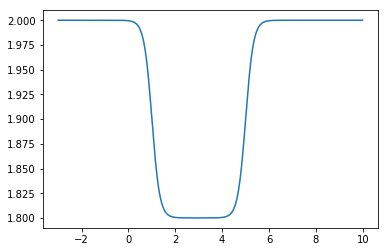

In [95]:
def geerts_logistic(t, a, k, t0, b=6.):
    return a + (k - a) / (1 + e**(-(b*(t-t0))))

def transit_model(t0=1, width=4, baseline=2., depth=0.2):
    t = np.arange(-3, 10, 0.01)
    x = geerts_logistic(t, a=baseline/2, k=baseline/2+depth, t0=t0+width)
    x += geerts_logistic(t, a=baseline/2, k=baseline/2-depth, t0=t0)
    return t, x

t, x = transit_model()
pl.plot(t, x)